In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings

warnings.filterwarnings("ignore")

In [33]:
from binance.client import Client
api_key = 'xVM7IUXNFne6yrZyGnHM605GdDUCQaoumMv8sEfKO6LeMdpo9XfzeoDgGOalhjoi'
secret = 'OhAFhj9WccUT1N3qrpJiXERXvI1PbsOVx6GgWAZmH7HgYr775l7N286CFQ4ZKh7B'
client = Client(api_key, secret)

In [34]:
candles = client.get_klines(symbol = 'BTCUSDT', interval = Client.KLINE_INTERVAL_30MINUTE) 
len(candles)

500

In [35]:
price = np.array([float(candles[i][4]) for i in range(500)])

time = np.array([int(candles[i][0]) for i in range(500)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

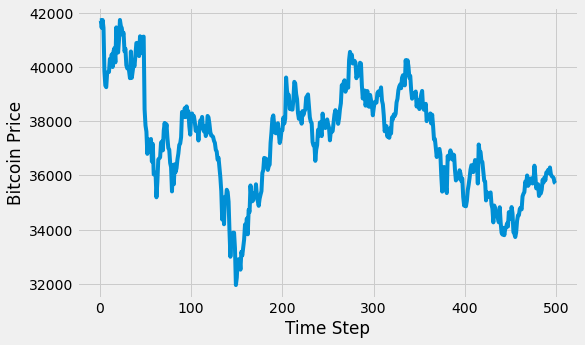

In [36]:
plt.figure(figsize = (8,5));
plt.xlabel('Time Step');
plt.ylabel('Bitcoin Price')
plt.plot(price);

In [37]:
timeframe = pd.DataFrame({'Time':t, 'Price $BTC': price})
timeframe

,Time,Price $BTC
0,09:30:00,41713.33
1,10:00:00,41714.99
2,10:30:00,41439.32
3,11:00:00,41724.15
4,11:30:00,41432.88
...,...,...
495,17:00:00,35974.96
496,17:30:00,35940.45
497,18:00:00,35911.34
498,18:30:00,35741.03


In [38]:
price = price.reshape(500,1)

In [39]:
# import pandas as pd
# from sklearn import preprocessing

# x = timeframe[['Price $BTC']].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# timeframe['BTC_Normalized'] = df

In [40]:
timeframe

,Time,Price $BTC,BTC_Normalized
0,09:30:00,41713.33,0.998744
1,10:00:00,41714.99,0.998914
2,10:30:00,41439.32,0.970674
3,11:00:00,41724.15,0.999852
4,11:30:00,41432.88,0.970015
...,...,...,...
495,17:00:00,35974.96,0.410902
496,17:30:00,35940.45,0.407367
497,18:00:00,35911.34,0.404385
498,18:30:00,35741.03,0.386938


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(price[:374])

price = scaler.transform(price)

df = pd.DataFrame(price.reshape(100,5), columns = ['First', 'Second', 'Third', 'Fourth', 'Target'])
# Here First, Second, Third, Fourth are the seconds over which it is trained 
# and target is the value which will be predicted

df.head()

,First,Second,Third,Fourth,Target
0,2.013341,2.014226,1.867269,2.019109,1.863836
1,1.014905,0.733108,0.700110,0.985558,0.998662
2,0.999675,1.255761,1.161841,1.343545,1.096180
3,1.406369,1.467003,1.186821,1.873884,1.626466
4,1.380728,1.634026,2.019877,1.899174,1.862130


## train test split

In [43]:
# 75% train, 25% test

x_train = df.iloc[:74, :4]
y_train = df.iloc[:74, -1]

x_test = df.iloc[75:99,:4]
y_test = df.iloc[75:99,-1]


In [52]:
y_train

0     1.863836
1     0.998662
2     1.096180
3     1.626466
4     1.862130
        ...   
69    0.358265
70    0.302024
71    0.121701
72    0.160238
73   -0.670759
Name: Target, Length: 74, dtype: float64

In [46]:
# Init the best SARIMAX model
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(
    y_train,
    exog=x_train,
    order=(0,1,1)
)

# training the model
results = model.fit()

# get predictions
# predictions = results.predict(start =train_size, end=train_size+test_size-2,exog=x_test)

In [47]:
predictions = results.predict(start =train_size, end=train_size+test_size-2,exog=x_test)

IndexError: index 24 is out of bounds for axis 0 with size 24

In [29]:
# # normalizing the time series
# sc_out = MinMaxScaler(feature_range=(0, 1))
# scaler_output = sc_out.fit_transform(timeframe[['Actual']])
# scaler_output =pd.DataFrame(scaler_output, index=timeframe.index)
# y=scaler_output
# y.rename(columns={0:'BTC Price next day'}, inplace= True)
# y.index=timeframe.index
# print("Normalized y")
# print(y.head())